In [132]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# number_of_vocals = 168277

In [143]:
def to_bow(tokens):
    """ Recibe una lista de tokens y devuelve un bow(diccionario) """
    bow = {}
    for token in tokens:
        if token in bow:
            bow[token] += 1
        else:
            bow[token] = 1
    return bow

def calculate_distance_to_origin(bow):
    sum = 0
    for quantity in bow:
        sum += (quantity)**2
    return sqrt(sum)

In [142]:
potencia = open("../analysis/potencia", 'r')

m = []
dim = 0
for line in potencia:
    if line.find("autovec") != -1:
        line = line[line.find("autovec") + 8:]
        dim = int(line[2:line.find(";")])
        line = line[line.find(";")+1:]
        line = line[:-2]
        line = line.strip().split(",")
        m.append(line)
m = np.matrix(m, dtype=float)

In [141]:
def tc(x):
    """Recibe una bow y le aplica la transf. caracteristica."""
    x_filtered = np.array([0]*dim)
    for (vocal, quantity) in x.items():
        if int(vocal) < dim:
            x_filtered[int(vocal)] = int(quantity)
    return np.array(m.dot(x_filtered))[0]
# tc({1:3, 10:5})

Para cada review hago lo siguiente:
1. Le aplico TC
2. Calculo la distancia al origen.
3. Lo agrego a la lista de distancias correspondiente por polaridad

In [129]:
reviews = open("../data/imdb_tokenized.csv", 'r')


positive_distances_to_origin = {}
negative_distances_to_origin = {}
for review in reviews:
    review = review.strip().split(',')
    polarity = review[2]
    
    bow = to_bow(review[3:])
    bow_transformed = tc(bow)
    
    distance = calculate_distance_to_origin(bow_transformed)
    if (polarity == "pos"):
        if distance in positive_distances_to_origin.keys():
            positive_distances_to_origin[distance] += 1
        else:
            positive_distances_to_origin[distance] = 1
    else:
        if distance in negative_distances_to_origin.keys():
            negative_distances_to_origin[distance] += 1
        else:
            negative_distances_to_origin[distance] = 1

print("Ok")

Ok


Experimento tener una mejor idea de la distribución deel training-set: 
1. Aplico TC a todos los vectores de training.
2. Ploteo las distancias al origen de cada uno (separando por polaridad)

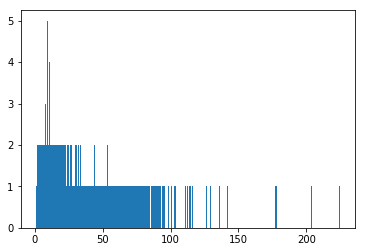

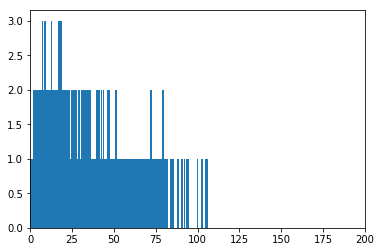

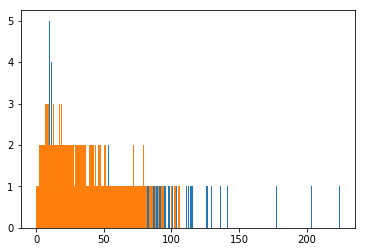

In [140]:
plt.bar(positive_distances_to_origin.keys(), positive_distances_to_origin.values())
plt.savefig("img/1")
plt.show()

plt.bar(negative_distances_to_origin.keys(), negative_distances_to_origin.values())
plt.xlim(0,200)
plt.savefig("img/2")
plt.show()

plt.bar(positive_distances_to_origin.keys(), positive_distances_to_origin.values())
plt.bar(negative_distances_to_origin.keys(), negative_distances_to_origin.values())
plt.savefig("img/3")